# 4 Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical phase in the data science workflow that helps us understand the structure, patterns, and relationships within the data before building any models or drawing final conclusions.

In this project, we are working with multiple datasets sourced from various domains of the movie industry, including IMDb, Rotten Tomatoes, The Numbers, and more. These datasets have been cleaned and are now ready for exploration. Some datasets have been merged where appropriate to enrich the context and enable cross-cutting insights.

The primary purpose of this EDA is to explore the datasets in-depth to:

- Understand the structure, range, and distribution of key variables such as genres, budgets, ratings, and revenues.
- Uncover patterns and trends across the movie industry over time.
- Investigate relationships between features such as production budget vs. revenue, ratings vs. genre, and cast/director influence on performance.
- Compare how data from different sources aligns or contrasts when merged around common identifiers (e.g., movie title or release year).
- Generate insights that will guide our studio's data-driven strategy on movie investment and distribution.

This EDA process will enable us to build a richer understanding of the film landscape and develop targeted recommendations for the studio.

## 4.1 Exploratory Data Analysis of The Numbers Movie Budgets Dataset

The Movie Budgets dataset contains information about the financial performance of films, including production budgets, gross revenues (domestic and worldwide), and release years. 

Through visualizations and summary statistics, we aim to extract insights that can support strategic decisions in:

- Movie investment planning
- Revenue performance benchmarking
- Identifying high-performing genres or studios
- Budget allocation for future film projects

This analysis sets the foundation for building data-driven recommendations tailored to the movie industry's financial and creative considerations.

In [32]:
# loading relevant libraries

# Core Data Analysis Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis Testing
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set visualization style
sns.set(style='whitegrid', palette = "pastel")
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the cleaned dataset 
budgets_df = pd.read_csv("Data/Cleaned_tn_movie_budget.csv")

#previewing the first 5 rows 
budgets_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,foreign_gross,total_profit/loss,domestic_profit/loss,foreign_profit/loss,ROI,release_year,release_month,domestic_share%,foreign_share%,budget_category,is_profitable
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,335507625.0,1.590838e+09,5.532577,2009,December,27.392401,72.607599,Blockbuster,1
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,-169536125.0,3.940000e+08,1.546673,2011,May,23.053668,76.946332,Blockbuster,1
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,-307237650.0,-2.430000e+08,-0.572108,2019,June,28.553472,71.446528,Blockbuster,0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,128405868.0,6.134081e+08,3.243841,2015,May,32.715702,67.284298,Blockbuster,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,303181382.0,3.795404e+08,3.153696,2017,December,47.100413,52.899587,Blockbuster,1


### 4.1.1 Univariate Analysis

The focus here is on understanding the distribution of individual columns

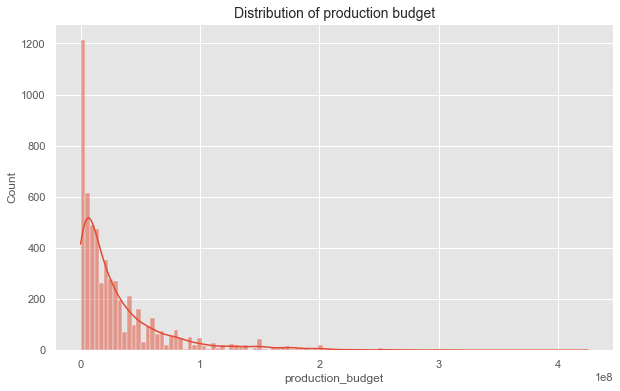

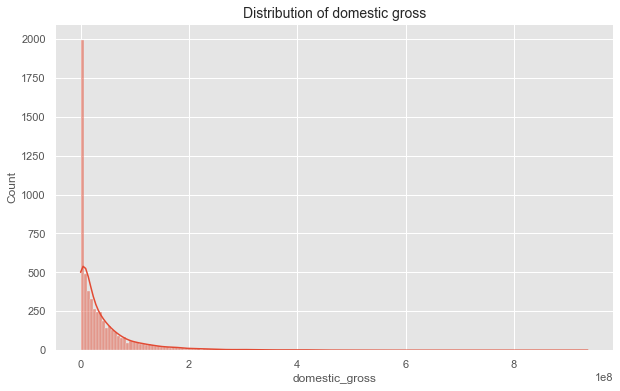

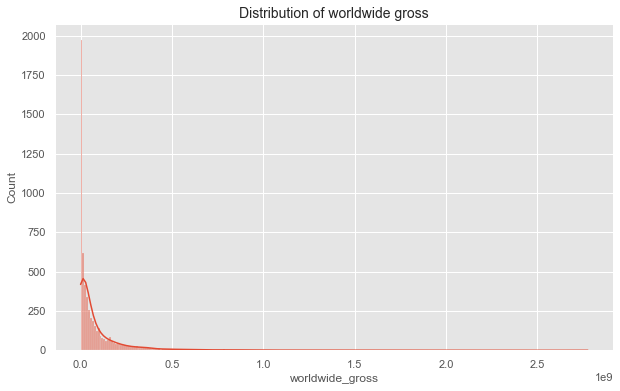

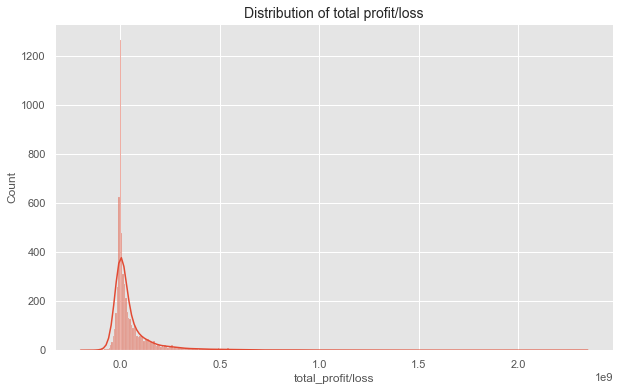

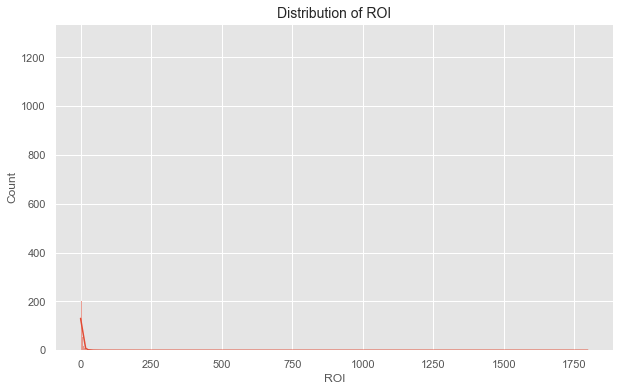

In [3]:
numeric_cols = ['production_budget', 'domestic_gross', 'worldwide_gross',
                'total_profit/loss', 'ROI']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(budgets_df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_"," ")}', fontsize = 14)
    plt.show()

#### Summary Observations

1. *Distribution of Production Budget*:
   - The distribution is highly right-skewed.
   - Most films have relatively low production budgets.
   - A small number of movies have extremely high budgets, resulting in a long tail on the right.

2. *Distribution of Domestic Gross*:
   - The distribution is also right-skewed.
   - A majority of films earn low domestic gross revenue.
   - Only a few films achieve very high domestic earnings.

3. *Distribution of Worldwide Gross*:
   - This distribution follows a similar skewed pattern.
   - Most movies earn modest worldwide gross.
   - A few blockbusters significantly outperform the rest, causing a long right tail.
   
4.  *Distribution of Total Profit/Loss*:
   - The distribution is also right-skewed.
   - A majority of films earn low profits with others having losses.
   - Only a few films achieve very high domestic earnings.

5.  *Distribution of ROI*:
   - This distribution follows a right skewed pattern.
   - Most movies have low ROI.   

> Overall, the data shows that the film industry is dominated by a small number of high-budget, high-earning movies, while most films operate within lower budget and revenue ranges.

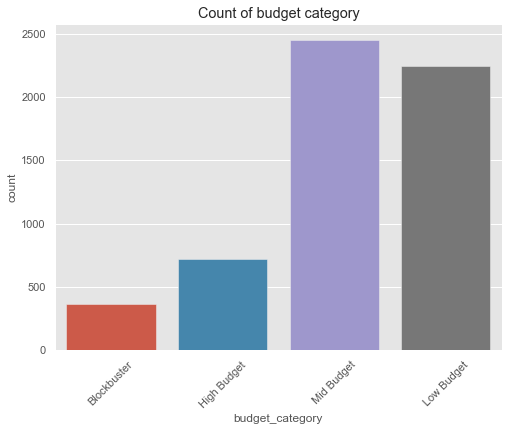

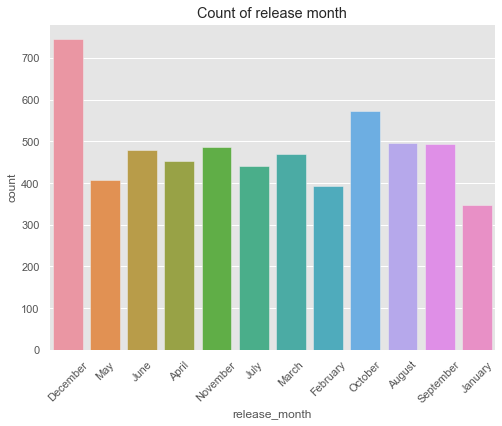

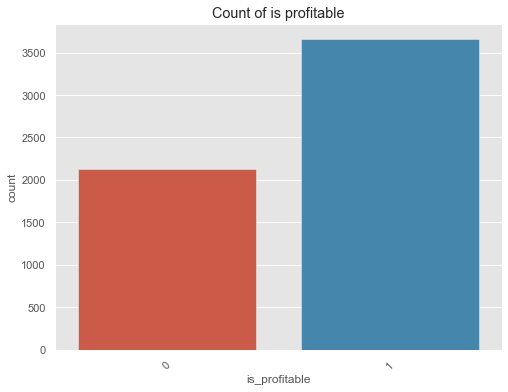

In [4]:
categorical_cols = ['budget_category', 'release_month', 'is_profitable']

for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=budgets_df, x=col)
    plt.title(f'Count of {col.replace("_"," ")}')
    plt.xticks(rotation=45)
    plt.show()


#### Summary Observations

1. Most movies fall under the low and mid budget category
2. Most movies are released in December followed by October then November, August, September, June and March which falls under the summer season and holidays.
3. Most movies are profitable with a considerable amount being unprofitable.

### 4.1.2 Bi-Variate Analysis

### 4.1.2.1 Profitability by Budget Category

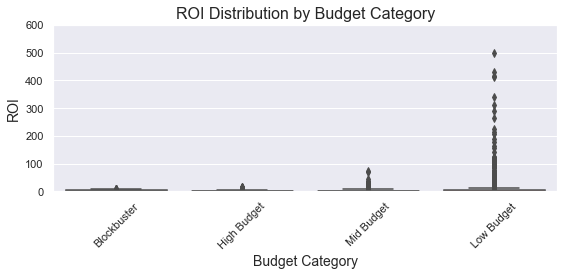

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=budgets_df, x='budget_category', y='ROI')
plt.ylim(0, 600)
plt.title("ROI Distribution by Budget Category", fontsize = 16)
plt.xlabel("Budget Category", fontsize=14)
plt.ylabel("ROI", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ROI Distribution by Budget Category

This boxplot displays the distribution of **Return on Investment (ROI)** across four movie budget categories:

- **Blockbuster**
- **High Budget**
- **Mid Budget**
- **Low Budget**

---

#### Observations:

- **Low Budget films** show a **wider spread** of ROI values, including the **highest outliers**, indicating some extremely successful low-budget productions.
- **Blockbusters and High Budget films** tend to have **tighter ROI distributions** and generally **lower median ROI**, reflecting more consistent but moderate returns.
- **Mid Budget films** show a slightly broader ROI spread than high-budget films, but still much less than low-budget ones.

---

#### Key Insights:

- **Low Budget films** offer high upside potential, but likely come with more variability and risk.
- **Blockbusters**, while costly, do not guarantee high ROI — they may gross a lot but their return relative to cost can be limited.
- **Mid-range budgets** may offer a balance between risk and return, though they generally do not yield the extreme highs seen in low-budget successes.

---

#### Interpretation Summary:

> ROI varies significantly across budget categories, with low-budget films achieving high returns. This highlights opportunities for studios to invest strategically in lower-budget films with strong market potential, especially if constraints on budget do not limit creative or commercial appeal.


### 4.1.2.2 Production Budget vs Worldwide Gross

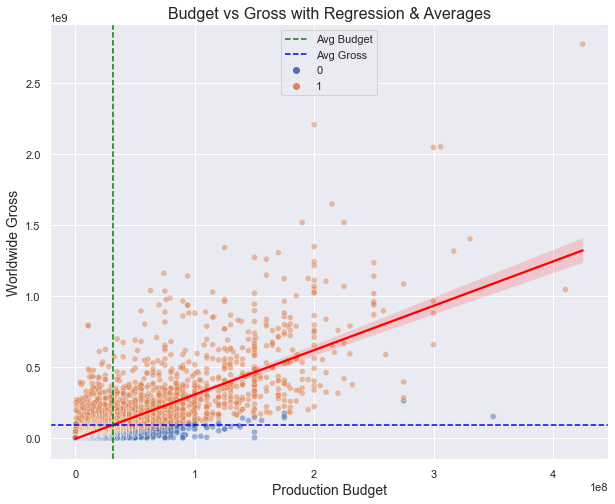

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=budgets_df, x='production_budget', y='worldwide_gross', alpha=0.5, hue='is_profitable')
sns.regplot(data=budgets_df, x='production_budget', y='worldwide_gross', scatter=False, color='red')

# Add reference line
plt.axvline(x=budgets_df['production_budget'].mean(), color='green', linestyle='--', label='Avg Budget')
plt.axhline(y=budgets_df['worldwide_gross'].mean(), color='blue', linestyle='--', label='Avg Gross')

plt.legend()
plt.title('Budget vs Gross with Regression & Averages', fontsize=16)
plt.xlabel('Production Budget', fontsize = 14)
plt.ylabel('Worldwide Gross', fontsize = 14)
plt.show()


#### Scatter Plot Analysis: Budget vs Worldwide Gross

This scatter plot visualizes the relationship between a movie’s **Production Budget** (x-axis) and its **Worldwide Gross Revenue** (y-axis). Each point represents a movie, with color coding based on profitability:

- 🟠 **Orange dots (1)**: Profitable movies  
- 🔵 **Blue dots (0)**: Non-profitable movies  

A **red regression line** has been added to indicate the general trend, along with two dashed lines:
- **Green dashed line**: Average production budget
- **Blue dashed line**: Average worldwide gross

---

#### Key Insights:

- **Positive Correlation**: There is a general upward trend — higher production budgets are often associated with higher gross revenues.
- **Profitability Pattern**: Many profitable movies fall **below the average budget line but above the average gross line**, suggesting **strong ROI among lower-budget films**.
- **Risk of High Budgets**: Some high-budget films (right of green line) are unprofitable (blue dots), highlighting potential risks of large investments.
- **Blockbusters**: A few movies in the upper-right corner are clear outliers, achieving massive grosses and likely driving studio profitability.
- **Variance**: The spread around the regression line shows that while budget is an important factor, it's **not the sole determinant** of a film's success.

---

#### Interpretation Summary:

> There is a generally positive relationship between production budget and worldwide gross. However, the wide variance in performance—especially among films with similar budgets—suggests that **budget alone does not guarantee success**. Strategic allocation of production resources, genre, release timing, and audience engagement also play critical roles in determining profitability.


### 4.1.2.3 Monthly Profitability Trends

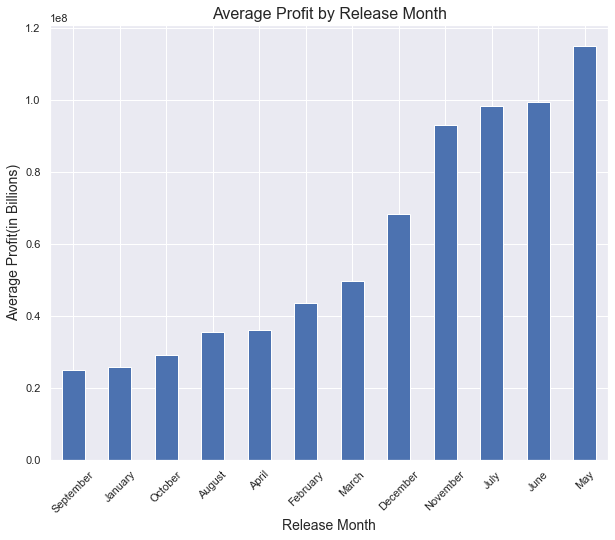

In [8]:
#group the data set by the average profit/loss in each month
monthly_avg_profit = budgets_df.groupby('release_month')['total_profit/loss'].mean().sort_values()

#plotting the average profit per month
monthly_avg_profit.plot(kind='bar', figsize=(10, 8))
plt.title('Average Profit by Release Month', fontsize=16)
plt.xlabel("Release Month", fontsize=14)
plt.ylabel('Average Profit(in Billions)', fontsize=14)
plt.xticks(rotation = 45)
plt.show()


#### Observations - Average Profit by Release Month

This bar chart shows the *average profit* of movies released in each month, helping reveal seasonal profitability trends in the film industry.

---

#### *Key Insights:*

- *Top Performing Months:*
  - May, June, July, and November have the highest average profits, close to or over $1 billion.
  - These months align with blockbuster seasons (summer and holidays).

- *Moderate Months:*
  - December and March also show strong profits.
  - February and April fall in the mid-range.

- *Low Performing Months:*
  - September, January, and October show the lowest average profits.
  - These months might be considered off-peak for major releases.

---

#### *Conclusion:*
- There is a clear seasonal trend in movie profitability.
- Studios maximize profits by releasing films during high-demand months like summer and holiday seasons.

### 4.1.2.4 Correlation Analysis

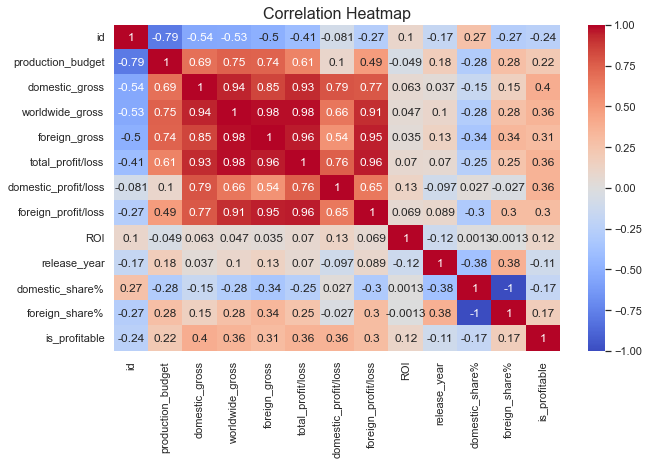

In [9]:
correlation_matrix = budgets_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#### Correlation Analysis Summary

- *Production Budget* has a strong positive correlation with:
  - domestic_gross (0.79)
  - worldwide_gross (0.75)
  - foreign_gross (0.74)  
  ➤ Bigger budgets tend to generate higher revenue.

- *Gross Revenue* variables are highly interrelated:
  - worldwide_gross ↔ domestic_gross (0.90)
  - worldwide_gross ↔ foreign_gross (0.97)  
  ➤ Worldwide gross is influenced by both domestic and foreign markets.

- *Profitability*:
  - total_profit/loss strongly correlates with both domestic_gross (0.77) and foreign_gross (0.77).
  - ROI has strong correlations with:
    - total_profit/loss (0.61)
    - foreign_profit/loss (0.60)
  - is_profitable has weak positive correlations with ROI, foreign_profit/loss, and foreign_share% (~0.17).

- *Revenue Share*:
  - domestic_share% and foreign_share% have a perfect negative correlation (-1.0), since they are complementary.

- *Temporal Insight*:
  - release_year shows minimal correlation with other variables, indicating no strong trend over time.

#### Conclusion
> Higher budgets often result in higher grosses and profits. Both domestic and foreign markets play a key role in profitability, with ROI and total profits being key indicators.

#### 4.1.2.5 Distribution of Domestic Vs Foreign Revenue Share

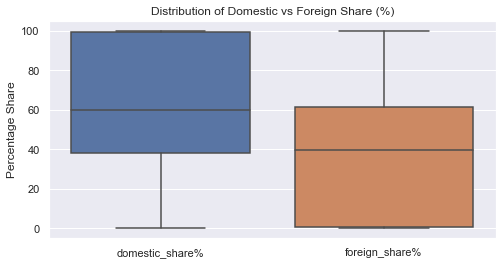

In [11]:
sns.boxplot(data=budgets_df[['domestic_share%', 'foreign_share%']])
plt.title("Distribution of Domestic vs Foreign Share (%)")
plt.ylabel("Percentage Share")
plt.show()

#### Distribution of Domestic vs Foreign Revenue Share

- The boxplot compares the percentage share of revenue from *domestic* and *foreign* markets.

#### Key Observations:
- *Domestic Share* has a *higher median* than the foreign share, indicating that most movies earn a larger portion of their revenue domestically.
- *Foreign Share* shows *greater variability*, with some movies earning almost all revenue from international markets.
- The *interquartile range* (IQR) for domestic share is wider, but with fewer extreme outliers than the foreign share.

#### Insight
> While many movies tend to rely more on domestic earnings, the foreign market is highly variable and can be a significant revenue source for certain films.

#### 4.1.2.6 Trends in Average Production Budget over the years


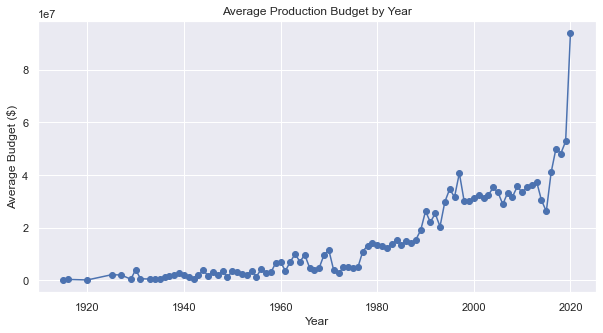

In [20]:
plt.figure(figsize=(10,5))
budgets_df.groupby('release_year')['production_budget'].mean().plot(kind='line', marker='o')
plt.title("Average Production Budget by Year")
plt.xlabel("Year")
plt.ylabel("Average Budget ($)")
plt.grid(True)
plt.show()


### 4.1.3 Multivariate Analysis - Relationship between the Budget Category and the Revenue Share of Domestic and Foreign markets

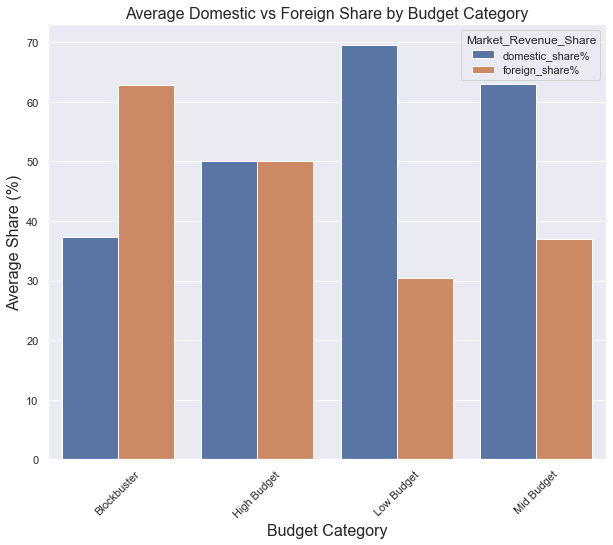

In [13]:
# Group by budget category and compute mean domestic and foreign shares of revenue
share_by_category = budgets_df.groupby('budget_category')[['domestic_share%', 'foreign_share%']].mean().reset_index()

# Melt to long format for easier plotting
share_melted = share_by_category.melt(id_vars='budget_category', var_name='Market_Revenue_Share', value_name='Average Share (%)')

# Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=share_melted, x='budget_category', y='Average Share (%)', hue='Market_Revenue_Share')
plt.title("Average Domestic vs Foreign Share by Budget Category", fontsize=16)
plt.xlabel ("Budget Category", fontsize = 16)
plt.ylabel("Average Share (%)", fontsize = 16)
plt.xticks(rotation=45)
plt.show()


#### Observations - Average Domestic vs Foreign Share by Budget Category

This plot compares the *average percentage of revenue* from *domestic* (U.S./home market) vs. *foreign* (international markets) across different *movie budget categories*.

---

#### *Axes:*
- *X-axis:* Budget Category  
  (e.g., Blockbuster, High Budget, Low Budget, Ultra Low Budget)
- *Y-axis:* Average Share (%)  
  (Percentage of total revenue)

---

#### *Bar Colors:*
- *Blue:* domestic_share%
- *Orange:* foreign_share%

---

#### *Key Observations:*

- *Blockbusters:*
  - Foreign share ~65% is much higher than domestic ~35%.
  - Suggests strong international performance.

- *High Budget:*
  - Fairly balanced between domestic and foreign ~50% each.
  - Indicates broad appeal both locally and abroad.

- *Mid Budget:*
  - Domestic share dominates ~68%, foreign is lower ~32%.
  - These films tend to have local appeal and limited global distribution.

- *Low Budget:*
  - Also skewed towards domestic revenue.
  - Likely have minimal international release or appeal.

---

#### *Conclusion:*
- As *budget increases*, foreign market share becomes more significant.
- Lower-budget films are generally *more dependent on domestic markets*.

## Hypothesis Testing of Movie Budgets Dataset

### Research Question 2
> Do high budget films have higher Return on Investment(ROI) than low-budget films?

#### Step 1: State the Null and Alternate Hypothesis

H₀ (null hypothesis): μ₁ >= μ₂ → High-budget films have higher or equal ROI with low-budget films

H₁ (alt hypothesis): μ₁ < μ₂ → High-budget films have lower ROI than low-budget films

#### Step 2: Specify the significance level

The significance level is 0.05.

#### Step 3: Calculate the test statitistic and p-value
This is done in the following code cell.

#### Step 4: Interpret the p-value
This is done in the code cell.

In [29]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

#create a new df for hypothesis testing
df = budgets_df  

# Define budget threshold 
budget_threshold = 50000000

# Create budget category column
df['budget_category_test'] = df['production_budget'].apply(
    lambda x: 'High Budget' if x > budget_threshold else 'Low Budget'
)

# Split ROI into two groups
high_budget_roi = df[df['budget_category_test'] == 'High Budget']['ROI']
low_budget_roi = df[df['budget_category_test'] == 'Low Budget']['ROI']

# Perform one-tailed Welch's t-test (alternative: low budget > high budget)
t_stat, p_val = ttest_ind(low_budget_roi, high_budget_roi, equal_var=False, alternative='greater')

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: High budget films have lower ROI than low budget films.")
else:
    print("Fail to reject the null hypothesis: No significant evidence High-budget films have lower ROI with low-budget films.")

T-statistic: 5.1142
P-value: 1.6356972230404518e-07
Reject the null hypothesis: High budget films have lower ROI than low budget films.


### Research Question 1
> Do high budget films have higher Return on Investment(ROI) than low-budget films?

#### Step 1: State the Null and Alternate Hypothesis

H₀ (null hypothesis): μ₁ >= μ₂ → High-budget films are less profitable than low budget films or have equal profitability

H₁ (alt hypothesis): μ₁ > μ₂ → High-budget films are more profitable than low-budget films

#### Step 2: Specify the significance level

The significance level is 0.05.

#### Step 3: Calculate the test statitistic and p-value
This is done in the following code cell.

#### Step 4: Interpret the p-value
This is done in the code cell.

In [31]:
# Split into two groups
high_budget_profits = df[df['budget_category_test'] == 'High Budget']['total_profit/loss']
low_budget_profits = df[df['budget_category_test'] == 'Low Budget']['total_profit/loss']

# Run Welch's t-test (unequal variances allowed)
t_stat, p_val = ttest_ind(high_budget_profits, low_budget_profits, equal_var=False, alternative='greater')

# Print Results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: High-budget films are significantly more profitable than low budget films.")
else:
    print("Fail to reject the null hypothesis: No significant evidence high-budget films are more profitable.")


T-statistic: 20.4893
P-value: 1.0299031654462523e-79
Reject the null hypothesis: High-budget films are significantly more profitable than low budget films.


## Business Recommendations from EDA of the Movie Budgets Dataset

Based on our exploratory data analysis (EDA), we propose the following

### 1. **High-Budget Films Yield Higher Total Revenue, But Lower ROI**
- While big-budget films tend to earn more in absolute terms (gross revenue), their **return on investment (ROI)** is generally lower than low-budget films.
- **Recommendation:** Consider a balanced production strategy that includes both high- and low-budget films. Low-budget films can yield high ROI and reduce financial risk.

### 2. **Profitability Correlates with Budget to Some Extent**
- A positive correlation was observed between **production budgets** and **profitability**, though not perfectly linear.
- **Recommendation:** Budget allocation should be aligned with genre, cast strength, and marketing strategy to optimize profit, not just scale of production.

### 3. **Release Year Trends Show Growing Budgets and Revenues**
- Over time, average production budgets and worldwide grosses have increased.
- **Recommendation:** New studios should consider inflation-adjusted budgeting when benchmarking against historical films and focus on modern audience preferences.

### 4. **Domestic vs Foreign Gross Shares**
- Some films generate the majority of their revenue from **foreign markets**, while others rely more on **domestic audiences**.
- **Recommendation:** Invest in market research to tailor content for global audiences and consider partnerships for international distribution.

### 5. **Seasonality in Releases**
- Films released in certain months (e.g., summer or holiday seasons) tend to perform better.
- **Recommendation:** Plan major releases around high-traffic months (e.g., May–July, November–December) to maximize exposure and potential earnings.

### 6. **Genre Insights (if available from merged datasets)**
- If genre-level insights were explored: certain genres may perform better on lower budgets (e.g., horror or documentaries).
- **Recommendation:** Use genre-budget-performance matching to guide content development decisions.

### 7. **Foreign Gross is Underutilized in Some Films**
- A subset of movies has minimal foreign gross compared to domestic, indicating untapped market potential.
- **Recommendation:** Improve foreign market strategy (subtitling, cultural adaptations, international trailers) to increase reach and ROI.

---

These recommendations aim to guide decision-makers on optimal budget allocation, release timing, and strategic planning for film production and distribution.
